In [456]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [457]:
from tkinter import *

In [458]:
from PIL import Image,ImageTk

In [459]:
from tkinter import messagebox

In [460]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [461]:
import seaborn as sns

In [462]:
l1=['itching','skin_rash','nodal_skin_eruptions','continuous_sneezing','shivering','chills','joint_pain',
    'stomach_pain','acidity','ulcers_on_tongue','muscle_wasting','vomiting','burning_micturition','spotting_ urination','fatigue',
    'weight_gain','anxiety','cold_hands_and_feets','mood_swings','weight_loss','restlessness','lethargy','patches_in_throat',
    'irregular_sugar_level','cough','high_fever','sunken_eyes','breathlessness','sweating','dehydration','indigestion',
    'headache','yellowish_skin','dark_urine','nausea','loss_of_appetite','pain_behind_the_eyes','back_pain','constipation',
    'abdominal_pain','diarrhoea','mild_fever','yellow_urine','yellowing_of_eyes','acute_liver_failure','fluid_overload',
    'swelling_of_stomach','swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
    'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs','fast_heart_rate',
    'pain_during_bowel_movements','pain_in_anal_region','bloody_stool','irritation_in_anus','neck_pain','dizziness','cramps',
    'bruising','obesity','swollen_legs','swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails',
    'swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips','slurred_speech','knee_pain','hip_joint_pain',
    'muscle_weakness','stiff_neck','swelling_joints','movement_stiffness','spinning_movements','loss_of_balance','unsteadiness','weakness_of_one_body_side',
    'loss_of_smell','bladder_discomfort','foul_smell_of urine','continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
    'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain','abnormal_menstruation','dischromic _patches',
    'watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum','rusty_sputum','lack_of_concentration','visual_disturbances',
    'receiving_blood_transfusion','receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen','history_of_alcohol_consumption',
    'fluid_overload','blood_in_sputum','prominent_veins_on_calf','palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling',
    'silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose','yellow_crust_ooze']
OPTIONS=sorted(l1)

In [463]:
print(len(l1))

132


In [464]:
disease=['Covid-19','Fungal infection','Allergy','GERD','Chronic cholestasis','Drug Reaction',
    'Peptic ulcer diseae','AIDS','Diabetes ','Gastroenteritis','Bronchial Asthma','Hypertension ',
    ' Migraine','Cervical spondylosis',
    'Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue','Typhoid','hepatitis A',
    'Hepatitis B','Hepatitis C','Hepatitis D','Hepatitis E','Alcoholic hepatitis','Tuberculosis',
    'Common Cold','Pneumonia','Dimorphic hemmorhoids(piles)',
    'Heartattack','Varicoseveins','Hypothyroidism','Hyperthyroidism','Hypoglycemia','Osteoarthristis',
    'Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne','Urinary tract infection','Psoriasis',
    'Impetigo']
OPTIONS2=sorted(disease)

In [465]:
l2=[]
for i in range(0,len(l1)):
    l2.append(0)

In [466]:
df=pd.read_csv("training.csv")

In [467]:
df.replace({'prognosis':{'Covid-19':0,'Fungal infection':1,'Allergy':2,'GERD':3,'Chronic cholestasis':4,'Drug Reaction':5,
        'Peptic ulcer diseae':6,'AIDS':7,'Diabetes ':8,'Gastroenteritis':9,'Bronchial Asthma':10,'Hypertension ':11,
    'Migraine':12,'Cervical spondylosis':13,
    'Paralysis (brain hemorrhage)':14,'Jaundice':15,'Malaria':16,'Chicken pox':17,'Dengue':18,'Typhoid':19,'hepatitis A':20,
    'Hepatitis B':21,'Hepatitis C':22,'Hepatitis D':23,'Hepatitis E':24,'Alcoholic hepatitis':25,'Tuberculosis':26,
    'Common Cold':27,'Pneumonia':28,'Dimorphic hemmorhoids(piles)':29,'Heart attack':30,'Varicose veins':31,'Hypothyroidism':32,
    'Hyperthyroidism':33,'Hypoglycemia':34,'Osteoarthristis':35,'Arthritis':36,
    '(vertigo) Paroymsal  Positional Vertigo':37,'Acne':38,'Urinary tract infection':39,'Psoriasis':40,
    'Impetigo':41}},inplace=True)

In [468]:
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [469]:
def plotScatterMatrix(df1, plotSize, textSize):
    df1 = df1.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df1 = df1.dropna('columns')
    df1 = df1[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df1 = df1[columnNames]
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df1.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

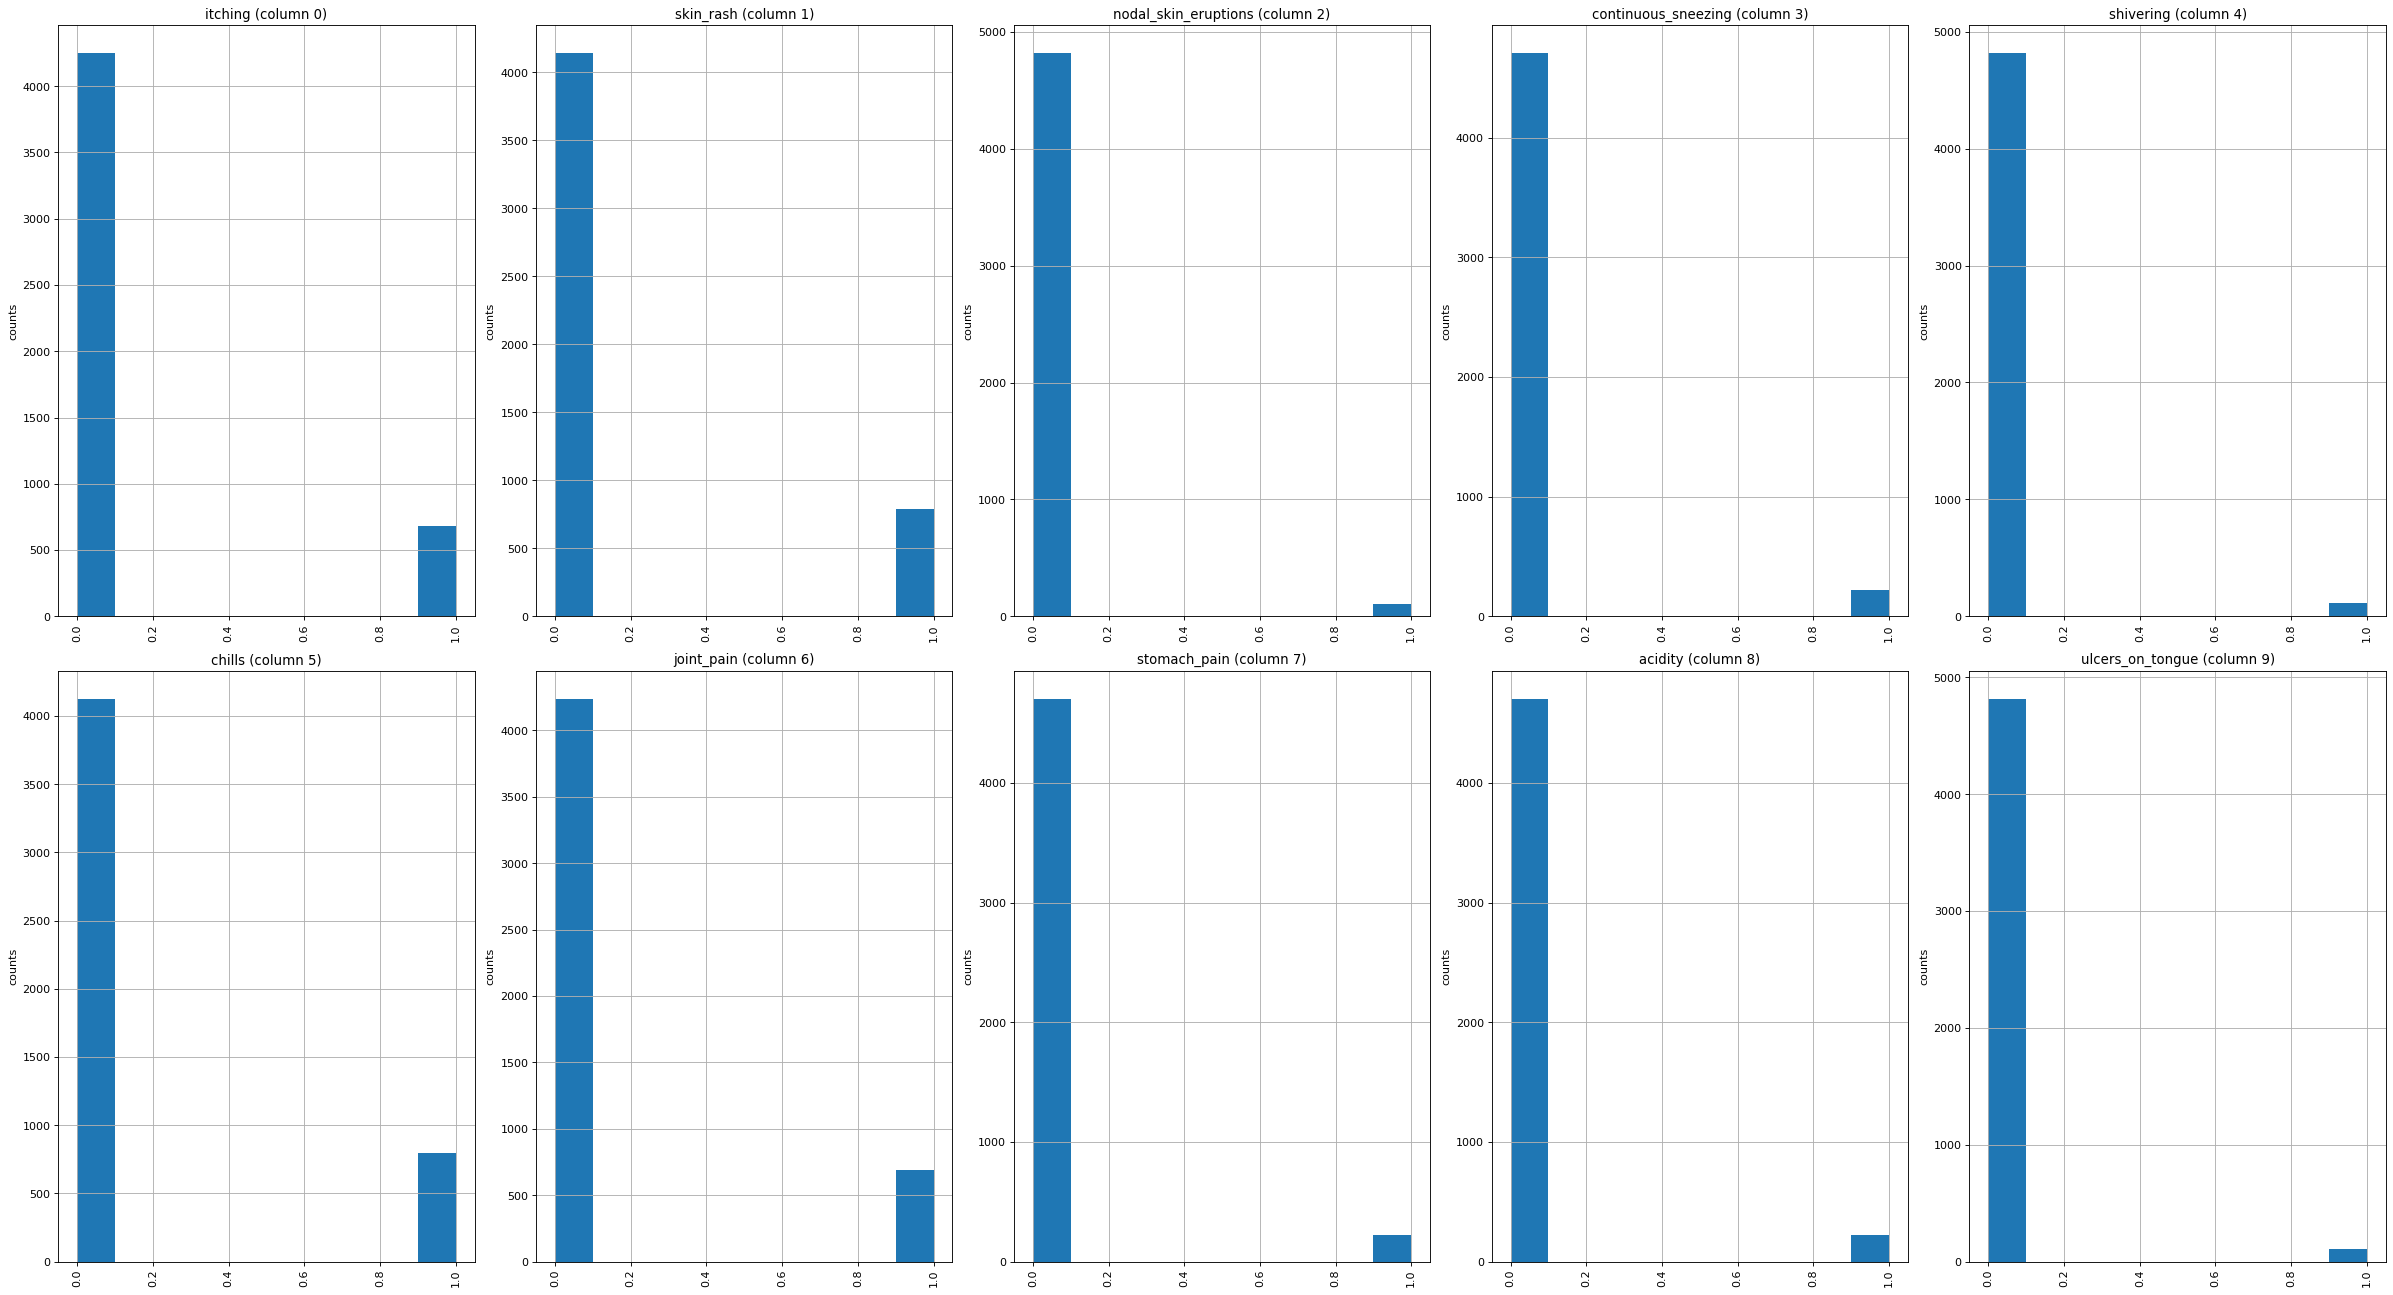

In [470]:
plotPerColumnDistribution(df, 10, 5)

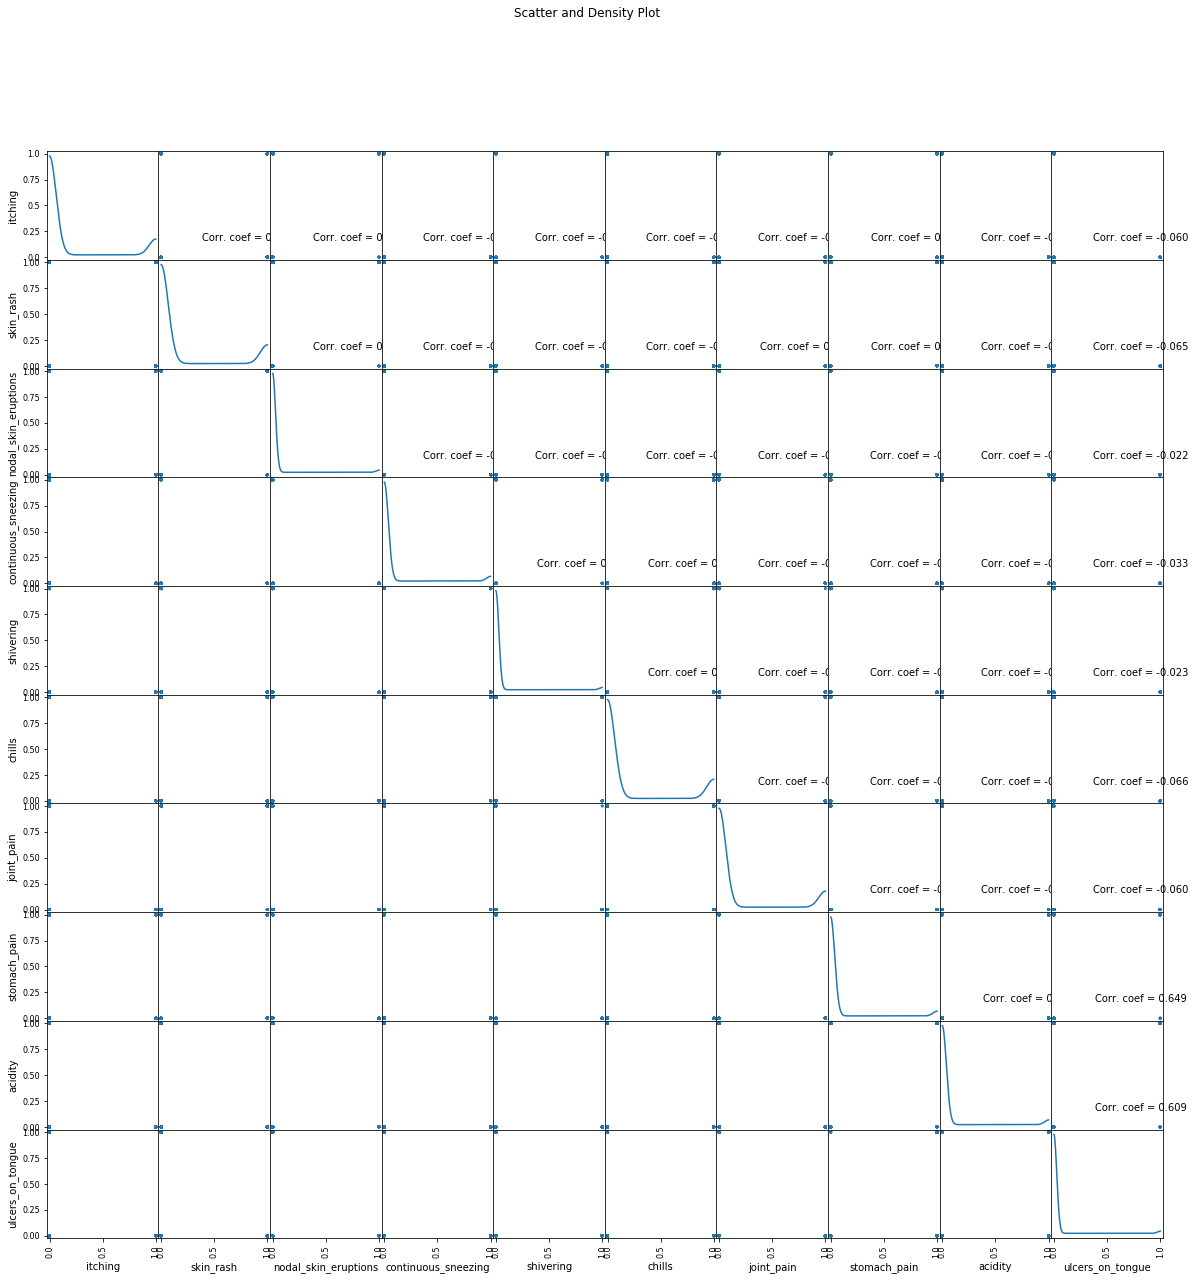

In [471]:
plotScatterMatrix(df, 20, 10)

In [472]:
X= df[l1]
y = df[["prognosis"]]
np.ravel(y)
print(X)
print(y)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           0          0                     0                    0   
1           0          0                     0                    0   
2           0          0                     0                    0   
3           0          0                     0                    0   
4           0          0                     0                    0   
...       ...        ...                   ...                  ...   
4920        0          0                     0                    0   
4921        0          1                     0                    0   
4922        0          0                     0                    0   
4923        0          1                     0                    0   
4924        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

In [473]:
tr=pd.read_csv("testing.csv")

In [474]:
tr.replace({'prognosis':{'Covid-19':0,'Fungal infection':1,'Allergy':2,'GERD':3,'Chronic cholestasis':4,'Drug Reaction':5,
        'Peptic ulcer diseae':6,'AIDS':7,'Diabetes ':8,'Gastroenteritis':9,'Bronchial Asthma':10,'Hypertension ':11,
    'Migraine':12,'Cervical spondylosis':13,
    'Paralysis (brain hemorrhage)':14,'Jaundice':15,'Malaria':16,'Chicken pox':17,'Dengue':18,'Typhoid':19,'hepatitis A':20,
    'Hepatitis B':21,'Hepatitis C':22,'Hepatitis D':23,'Hepatitis E':24,'Alcoholic hepatitis':25,'Tuberculosis':26,
    'Common Cold':27,'Pneumonia':28,'Dimorphic hemmorhoids(piles)':29,'Heart attack':30,'Varicose veins':31,'Hypothyroidism':32,
    'Hyperthyroidism':33,'Hypoglycemia':34,'Osteoarthristis':35,'Arthritis':36,
    '(vertigo) Paroymsal  Positional Vertigo':37,'Acne':38,'Urinary tract infection':39,'Psoriasis':40,
    'Impetigo':41}},inplace=True)
tr.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,3
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


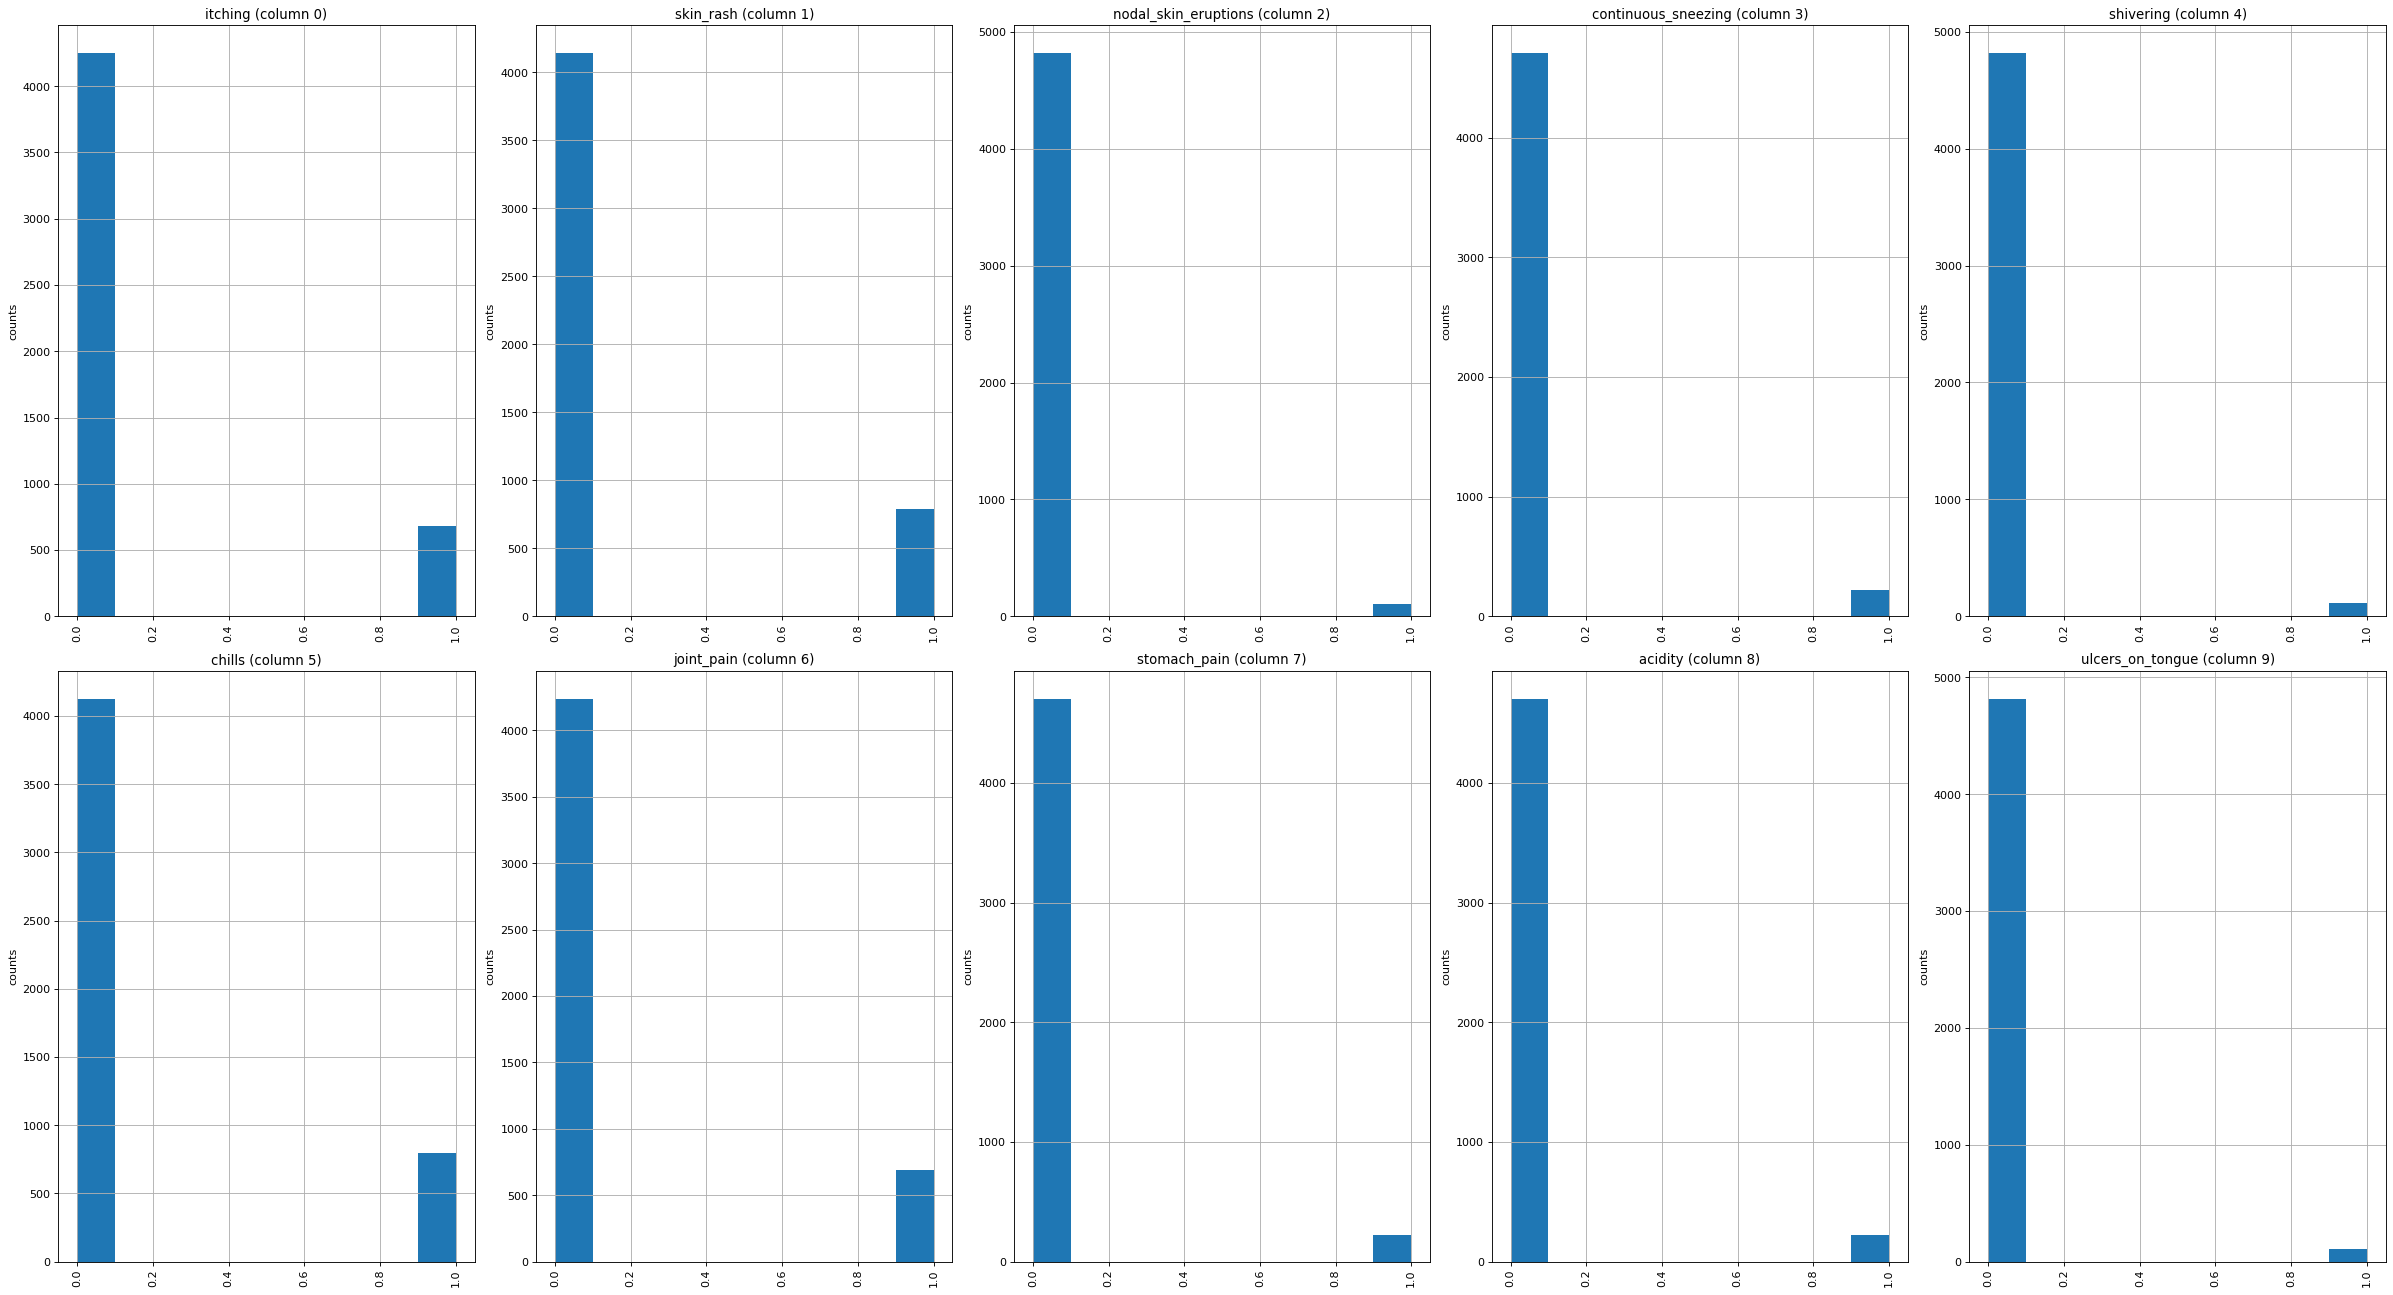

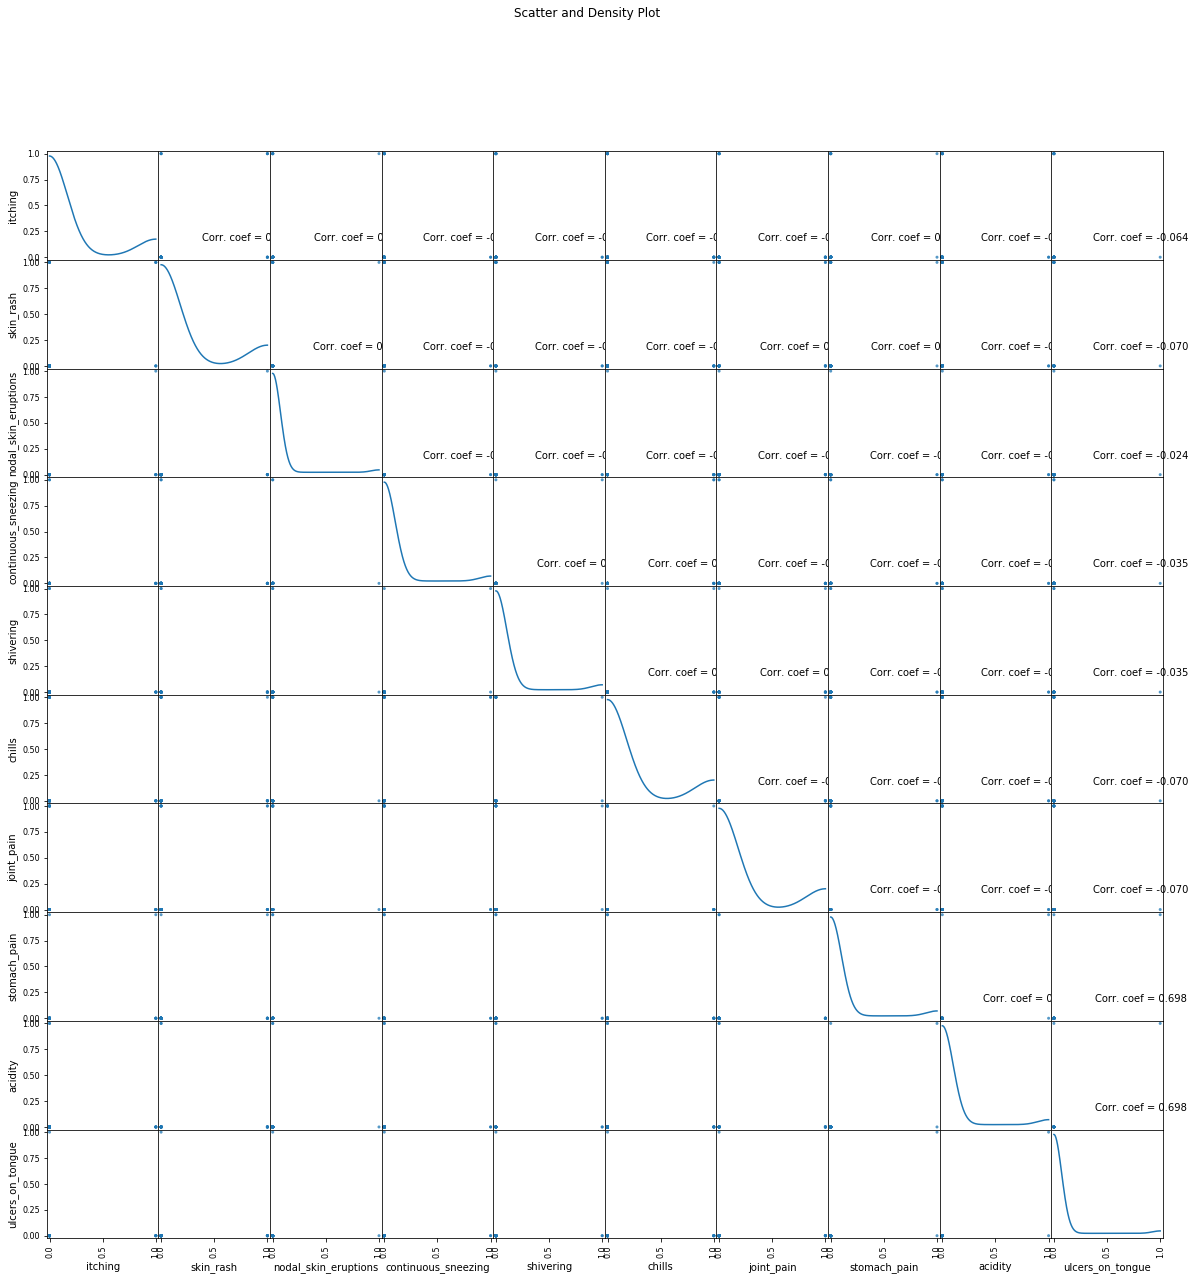

In [475]:
plotPerColumnDistribution(tr, 10, 5)
plotScatterMatrix(tr, 20, 10)

In [476]:
X_test= tr[l1]
y_test = tr[["prognosis"]]
np.ravel(y_test)
print(X_test)
print(y_test)

    itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         0          0                     0                    0          1   
1         1          1                     1                    0          0   
2         0          0                     0                    1          1   
3         0          0                     0                    0          0   
4         1          0                     0                    0          0   
5         1          1                     0                    0          0   
6         0          0                     0                    0          0   
7         0          0                     0                    0          0   
8         0          0                     0                    0          0   
9         0          0                     0                    0          0   
10        0          0                     0                    0          0   
11        0          0                  

In [477]:
def scatterplt(disea):
    x = ((df.loc[disea]).sum())#total sum of symptom reported for given disease
    x.drop(x[x==0].index,inplace=True)#droping symptoms with values 0
    print(x.values)
    y = x.keys()#storing nameof symptoms in y
    print(len(x))
    print(len(y))
    plt.title(disea)
    plt.scatter(y,x.values)
    plt.show()

In [478]:
def scatterinp(sym1,sym2,sym3,sym4,sym5):
    x = [sym1,sym2,sym3,sym4,sym5]#storing input symptoms in y
    y = [0,0,0,0,0]#creating and giving values to the input symptoms
    if(sym1!='Select Here'):
        y[0]=1
    if(sym2!='Select Here'):
        y[1]=1
    if(sym3!='Select Here'):
        y[2]=1
    if(sym4!='Select Here'):
        y[3]=1
    if(sym5!='Select Here'):
        y[4]=1
    print(x)
    print(y)
    plt.scatter(x,y)
    plt.show()

In [479]:
frame1=Tk()

In [480]:
pred1=StringVar()

In [481]:
    Symptom1 = StringVar()
    Symptom1.set("Select Here")        
    Symptom2 = StringVar()
    Symptom2.set("Select Here")
    Symptom3 = StringVar()
    Symptom3.set("Select Here")
    Symptom4 = StringVar()
    Symptom4.set("Select Here")
    Symptom5 = StringVar()
    Symptom5.set("Select Here")
    Disease = StringVar()
    Disease.set("Select Here") 
    lst=[]
    Name = StringVar()

In [482]:
def bysymptoms():
    frame2=Toplevel(frame1)
    frame2.geometry("600x600")
    frame2.title('Enter Symptoms')
    
    label1=Label(frame2,text="Please Enter Your Symptoms To Diagnose Yourself", bg="silver",relief="solid",font=("arial",16,"bold")).pack(fill=BOTH, pady=20,padx=20) 
    NameLb = Label(frame2, text="Name of the Patient", bg="silver", relief="solid")
    NameLb.config(font=("Times",13,"bold"))
    NameLb.place(relx=0.10,rely=0.11)
    NameEn = Entry(frame2, textvariable=Name)
    NameEn.place(relx=0.60, rely=0.11)
    S1Lb = Label(frame2, text="Please select Symptom 1", fg="Black", bg="silver",relief="solid",font=("Times",13,"bold")).place(relx=0.10,rely=0.16)
    S2Lb = Label(frame2, text="Please select Symptom 2", fg="Black", bg="silver",relief="solid",font=("Times",13,"bold")).place(relx=0.10,rely=0.22)
    S3Lb = Label(frame2, text="Please select Symptom 3", fg="Black", bg="silver",relief="solid",font=("Times",13,"bold")).place(relx=0.10,rely=0.28)
    S4Lb = Label(frame2, text="Please select Symptom 4", fg="Black", bg="silver",relief="solid",font=("Times",13,"bold")).place(relx=0.10,rely=0.34)
    S5Lb = Label(frame2, text="Please select Symptom 5", fg="Black", bg="silver",relief="solid",font=("Times",13,"bold")).place(relx=0.10,rely=0.40)
    S1 = OptionMenu(frame2,Symptom1,*OPTIONS).place(relx=0.60,rely=0.16)
    S2 = OptionMenu(frame2,Symptom2,*OPTIONS).place(relx=0.60,rely=0.22)
    S3 = OptionMenu(frame2,Symptom3,*OPTIONS).place(relx=0.60,rely=0.28)
    S4 = OptionMenu(frame2,Symptom4,*OPTIONS).place(relx=0.60,rely=0.34)
    S5 = OptionMenu(frame2,Symptom5,*OPTIONS).place(relx=0.60,rely=0.40)
    lbl=Label(frame2, text="You Might Have the Following Disease(s):- ",relief="solid",bg="silver",font=("Times",19,"bold italic")).place(relx=0.10,rely=0.50)
    dst = Button(frame2, text=" By  Decision tree  ", fg="Black", bg="silver",relief=RAISED,font=("Times",13,"bold"),command=DecisionTree).place(relx=0.10,rely=0.63)
    rnf = Button(frame2, text="By Random Forest", fg="Black", bg="silver",relief=RAISED,font=("Times",13,"bold"),command=randomforest).place(relx=0.10,rely=0.69)
    lr = Button(frame2,  text="   By  Naive  Bayes ", fg="Black", bg="silver",relief=RAISED,font=("Times",13,"bold"),command=NaiveBayes).place(relx=0.10,rely=0.75)
    rs = Button(frame2,text="Reset Inputs", bg="silver",relief=RAISED,font=("Times",13,"bold"),command=Reset).place(relx=0.10,rely=0.81)
    t1=Label(frame2,font=("Times",10,"bold italic"),width=25,textvariable=pred1,relief="sunken").place(relx=0.60,rely=0.63)
    t2=Label(frame2,font=("Times",10,"bold italic"),width=25,textvariable=pred2,relief="sunken").place(relx=0.60,rely=0.69)
    t3=Label(frame2,font=("Times",10,"bold italic"),width=25,textvariable=pred3,relief="sunken").place(relx=0.60,rely=0.75)
    frame2.mainloop()

In [483]:
pred2=StringVar()
def randomforest():
    if len(Name.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            frame1.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            frame1.mainloop()
    else:
        print(Name.get())
        from sklearn.ensemble import RandomForestClassifier
        clf4 = RandomForestClassifier(n_estimators=100)
        clf4 = clf4.fit(X,np.ravel(y)) 
        
        
        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf4.predict(X_test)
        print("Random Forest")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)   
        
        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1
        inputtest = [l2]
        predict = clf4.predict(inputtest)
        predicted=predict[0]
        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break
        if (h=='yes'):
            pred2.set(" ")
            pred2.set(disease[a])
        else:
            pred2.set(" ")
            pred2.set("Not Found")
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS RandomForest(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO RandomForest(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(Name.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred2.get()))
        conn.commit()  
        c.close() 
        conn.close()
        scatterplt(pred2.get())

In [484]:
pred3=StringVar()
def NaiveBayes():
    if len(Name.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            frame1.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            frame1.mainloop()
    else:
        print(Name.get())
        from sklearn.naive_bayes import GaussianNB
        gnb = GaussianNB()
        gnb=gnb.fit(X,np.ravel(y))

        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=gnb.predict(X_test)
        print("Naive Bayes")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = gnb.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break
        if (h=='yes'):
            pred3.set(" ")
            pred3.set(disease[a])
        else:
            pred3.set(" ")
            pred3.set("Not Found")
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS NaiveBayes(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO NaiveBayes(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(Name.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred3.get()))
        conn.commit()  
        c.close() 
        conn.close()
         #printing scatter plot of disease predicted vs its symptoms
        scatterplt(pred3.get())

In [485]:
pred1=StringVar()
def DecisionTree():
    if len(Name.get()) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            frame1.mainloop()
    elif((Symptom1.get()=="Select Here") or (Symptom2.get()=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            frame1.mainloop()
    else:
        print(Name.get())
        from sklearn import tree

        clf3 = tree.DecisionTreeClassifier() 
        clf3 = clf3.fit(X,y)

        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf3.predict(X_test)
        print("Decision Tree")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]

        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = clf3.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break

    
        if (h=='yes'):
            pred1.set(" ")
            pred1.set(disease[a])
        else:
            pred1.set(" ")
            pred1.set("Not Found")
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS DecisionTree(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO DecisionTree(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(Name.get(),Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get(),pred1.get()))
        conn.commit()  
        c.close() 
        conn.close()
        #printing scatter plot of input symptoms
        #printing scatter plot of disease predicted vs its symptoms
        scatterinp(Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get())
        scatterplt(pred1.get())

In [486]:
prev_win=None
def Reset():
    global prev_win
    Symptom1.set("Select Here")
    Symptom2.set("Select Here")
    Symptom3.set("Select Here")
    Symptom4.set("Select Here")
    Symptom5.set("Select Here")
    Disease.set("Select Here")    
    NameEn.delete(first=0,last=100)
    pred1.set(" ")
    pred2.set(" ")
    pred3.set(" ")
    try:
        prev_win.destroy()
        prev_win=None
    except AttributeError:
        pass

In [487]:
def chkcvd():
    frame3=Toplevel(frame1)
    frame3.geometry("1200x700")
    frame3.title("Covid-19 Insights")
    lb=Label(frame3,text="Current Situation of Covid-19 in India", relief="solid", bg="silver",font=("arial",16,"bold")).pack(fill=BOTH,padx=20,pady=20)
    df = pd.read_csv('covid_19_india.csv')
    sns.set(style="white")
    f1, ax = plt.subplots(figsize=(8, 8))
    sns.lineplot(x = "Date", y = "Cured", data = df)
    plt.ylabel("Cured")
    fig1 = f1
    canvas1 = FigureCanvasTkAgg(fig1, master=frame3)
    canvas1.draw()
    canvas1.get_tk_widget().place(relx=0.03,rely=0.1)    
    f2, ax = plt.subplots(figsize=(8, 8))
    sns.lineplot(x = "Date", y = "Confirmed", data = df)
    plt.ylabel("Confirmed")
    fig2 = f2
    canvas2 = FigureCanvasTkAgg(fig2, master=frame3)
    canvas2.draw()
    canvas2.get_tk_widget().place(relx=0.5,rely=0.1)
    frame3.mainloop()

In [488]:
 def chksym():
       
        frame5=Toplevel(frame1)
        frame5.geometry("600x300")
        frame5.title("Symptoms")
        label1=Label(frame5, text="Following are the symptoms of selected Disease", bg="silver",relief="solid",font=("arial",16,"bold")).pack(fill=BOTH,pady=20,padx=20)
        x=Disease.get()   
        df=pd.read_csv("testing.csv")
        df1=df.T
        df1=df.set_index('prognosis')
        df2=df1.T
        y=df2.loc[:,x]
        z=y.to_frame()
        q=z[z[x]==1]
        y=list(q.index)
        scrollbar = Scrollbar(frame5)
        scrollbar.pack( side = RIGHT, fill = Y )
        t = Listbox(frame5,yscrollcommand = scrollbar.set)
        for x in y:
            t.insert(END,x)
        
        scrollbar.config( command = t.yview )
        t.pack(fill=BOTH,padx=10,pady=8)
        frame5.mainloop()
    

In [489]:

def checksymptoms():
    frame4=Toplevel(frame1)
    frame4.geometry("600x600")
    frame4.title("Check Symptoms")   
    lb=Label(frame4,text="Symptoms of various Diseases :-",relief="solid", bg="silver",font=("arial",16,"bold")).pack(fill=BOTH,padx=20,pady=20)
    D = OptionMenu(frame4,Disease,*OPTIONS2).place(relx=0.70,rely=0.15)
    DLb = Label(frame4, text="Please select the Disease ", fg="Black", bg="silver",relief="solid",font=("Times",13,"bold")).place(relx=0.10,rely=0.16)
    button3=Button(frame4,text="Check Symptoms",bg="silver",relief=RAISED,font=("arial",12,"bold"),command=chksym).pack(fill=BOTH, padx=20,pady=80)   
    img=Image.open("C:/Users/DELL/Desktop/b0c89a8749054f64a17f658ea1fd52cb (3).png")
    img=ImageTk.PhotoImage(img)
    logo1=Label(frame4,image=img).pack()
    t = Listbox(frame4)
    y=lst
    '''
    for x in y:
        t.insert(END,x)
    t.pack(fill=BOTH,padx=10,pady=8)'''
    frame4.mainloop()

In [490]:
frame1.title("DR.Healthy")
frame1.geometry("600x600")
label1=Label(frame1, text="Welcome to DR.Health - Your personal physician", bg="silver",relief="solid",font=("arial",16,"bold"))
label1.pack(fill=BOTH,padx=20,pady=20)
img=Image.open("C:/Users/DELL/Desktop/b0c89a8749054f64a17f658ea1fd52cb (3).png")
img=ImageTk.PhotoImage(img)
logo=Label(image=img).pack()
label2=Label(frame1, text="Consult your personal doctor about the symptoms that you are having",font=("arial",10,"italic")).pack()
label3=Label(frame1, text="OR",font=("arial",10,"italic")).pack()
label4=Label(frame1, text="Check the symptoms for diseases that you feel you might have",font=("arial",10,"italic")).pack()
button1=Button(frame1,text="Enter Symptoms",bg="grey",relief=RAISED,font=("arial",12,"bold"),command=bysymptoms).pack(fill=BOTH, padx=2,pady=10)
button2=Button(frame1,text="Check symptoms",bg="grey",relief=RAISED,font=("arial",12,"bold"),command=checksymptoms).pack(fill=BOTH, padx=2,pady=10)
button3=Button(frame1,text="Check Covid-19 Insights",bg="red",fg="yellow",relief=RAISED,font=("arial",12,"bold"),command=chkcvd).pack(fill=BOTH, padx=2,pady=10)
label5=Label(frame1, text="About us :- This a college level project determined to provide OPD services through various machine learning algorithms.",font=("arial",8,"italic")).pack()

111
Decision Tree
Accuracy
1.0
42
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
['blood_in_sputum', 'blurred_and_distorted_vision', 'constipation', 'dehydration', 'distention_of_abdomen']
[1, 1, 1, 1, 1]


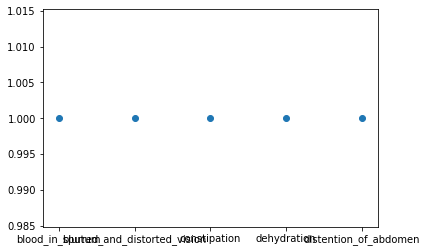

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 2646, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 111, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 135, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index_class_helper.pxi", line 109, in pandas._libs.index.Int64Engine._check_type
KeyError: 'Tuberculosis'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-485-0bc8aadddac0>", line 65, in DecisionTree
    scatterplt(pred1.get())
  File "<ipython-input-477-c9779cab16a2>", line 2, in scatterplt
    x = ((df.loc[disea]).sum())#total sum of symptom reported for given disease
  File "C:\Users\DELL\anaconda3\lib\site-pac

111
Random Forest
Accuracy
1.0
42
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 2646, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 111, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 135, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index_class_helper.pxi", line 109, in pandas._libs.index.Int64Engine._check_type
KeyError: 'Tuberculosis'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-483-dd8cebc69ab9>", line 57, in randomforest
    scatterplt(pred2.get())
  File "<ipython-input-477-c9779cab16a2>", line 2, in scatterplt
    x = ((df.loc[disea]).sum())#total sum of symptom reported for given disease
  File "C:\Users\DELL\anaconda3\lib\site-pac

111
Naive Bayes
Accuracy
1.0
42
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 2646, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 111, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 135, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index_class_helper.pxi", line 109, in pandas._libs.index.Int64Engine._check_type
KeyError: 'Gastroenteritis'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-484-fdbb3cbedca8>", line 59, in NaiveBayes
    scatterplt(pred3.get())
  File "<ipython-input-477-c9779cab16a2>", line 2, in scatterplt
    x = ((df.loc[disea]).sum())#total sum of symptom reported for given disease
  File "C:\Users\DELL\anaconda3\lib\site-pa

In [491]:
frame1.mainloop()